In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
years = np.arange(2019,2051)
current_co2e = 180000
target_2030 = 90000
net_zero = 2045

co2e_expected = np.zeros(years.shape)
co2e_expected[0] = 190766
co2e_expected[1] = 179141
co2e_expected[2] = 113601
co2e_expected[3:12] = [(8-x)/8*(current_co2e-target_2030)+target_2030 for x in range(9)]
co2e_expected[11:27] = [(15-x)/15*(target_2030) for x in range(16)]


ambition_factor = np.ones(co2e_expected.shape)
ambition_factor[3:7] *= np.linspace(1.0,0.8,4)
ambition_factor[7:] *= np.linspace(0.8,1.1,co2e_expected.size-7)
example_trajectory = np.random.normal(ambition_factor*co2e_expected,scale=2e3)
example_trajectory[:3] = co2e_expected[:3]
example_trajectory[example_trajectory < 0] = 0


In [3]:
print(years)
print(co2e_expected)
print(example_trajectory)

[2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 2047 2048 2049 2050]
[190766. 179141. 113601. 180000. 168750. 157500. 146250. 135000. 123750.
 112500. 101250.  90000.  84000.  78000.  72000.  66000.  60000.  54000.
  48000.  42000.  36000.  30000.  24000.  18000.  12000.   6000.      0.
      0.      0.      0.      0.      0.]
[190766.         179141.         113601.         180886.2766343
 157365.60155151 138622.082664   118210.87996539 106454.47859679
  98863.63889155  91950.75030262  83863.47988179  76907.22633194
  73803.29369951  67325.48925207  64043.72752202  61683.92190042
  55915.28127611  52558.52239935  44553.60544402  44012.07391384
  35351.95451348  25120.35813119  23169.85375444  18943.17825692
  13456.42570131   6989.34215599      0.            394.09667868
   1523.61014758    557.62442126      0.           2235.58502898]


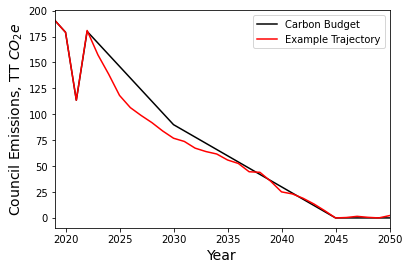

In [4]:
plt.plot(years,co2e_expected/1e3,'k',label='Carbon Budget')
plt.plot(years,example_trajectory/1e3,'r-',label='Example Trajectory')
plt.xlim([2019,2050])
plt.xlabel('Year',size=14)
plt.ylabel('Council Emissions, TT $CO_2e$',size=14)
plt.legend()
plt.savefig('Example Trajectory.png',facecolor='white',dpi=300)

In [5]:
total_budget = np.sum(co2e_expected[2:])
budget_example = np.sum(example_trajectory[2:])
print('The budget is: {:.3f} million tonnes CO2e'.format(total_budget/1e6))
print('The example trajectory has: {:.3f} million tonnes CO2e'.format(budget_example/1e6))
print('The successful reduction is {:.1f}%'.format(100*(total_budget-budget_example)/total_budget))

The budget is: 1.959 million tonnes CO2e
The example trajectory has: 1.758 million tonnes CO2e
The successful reduction is 10.2%


In [110]:
co2e_expected[2]

113601.0

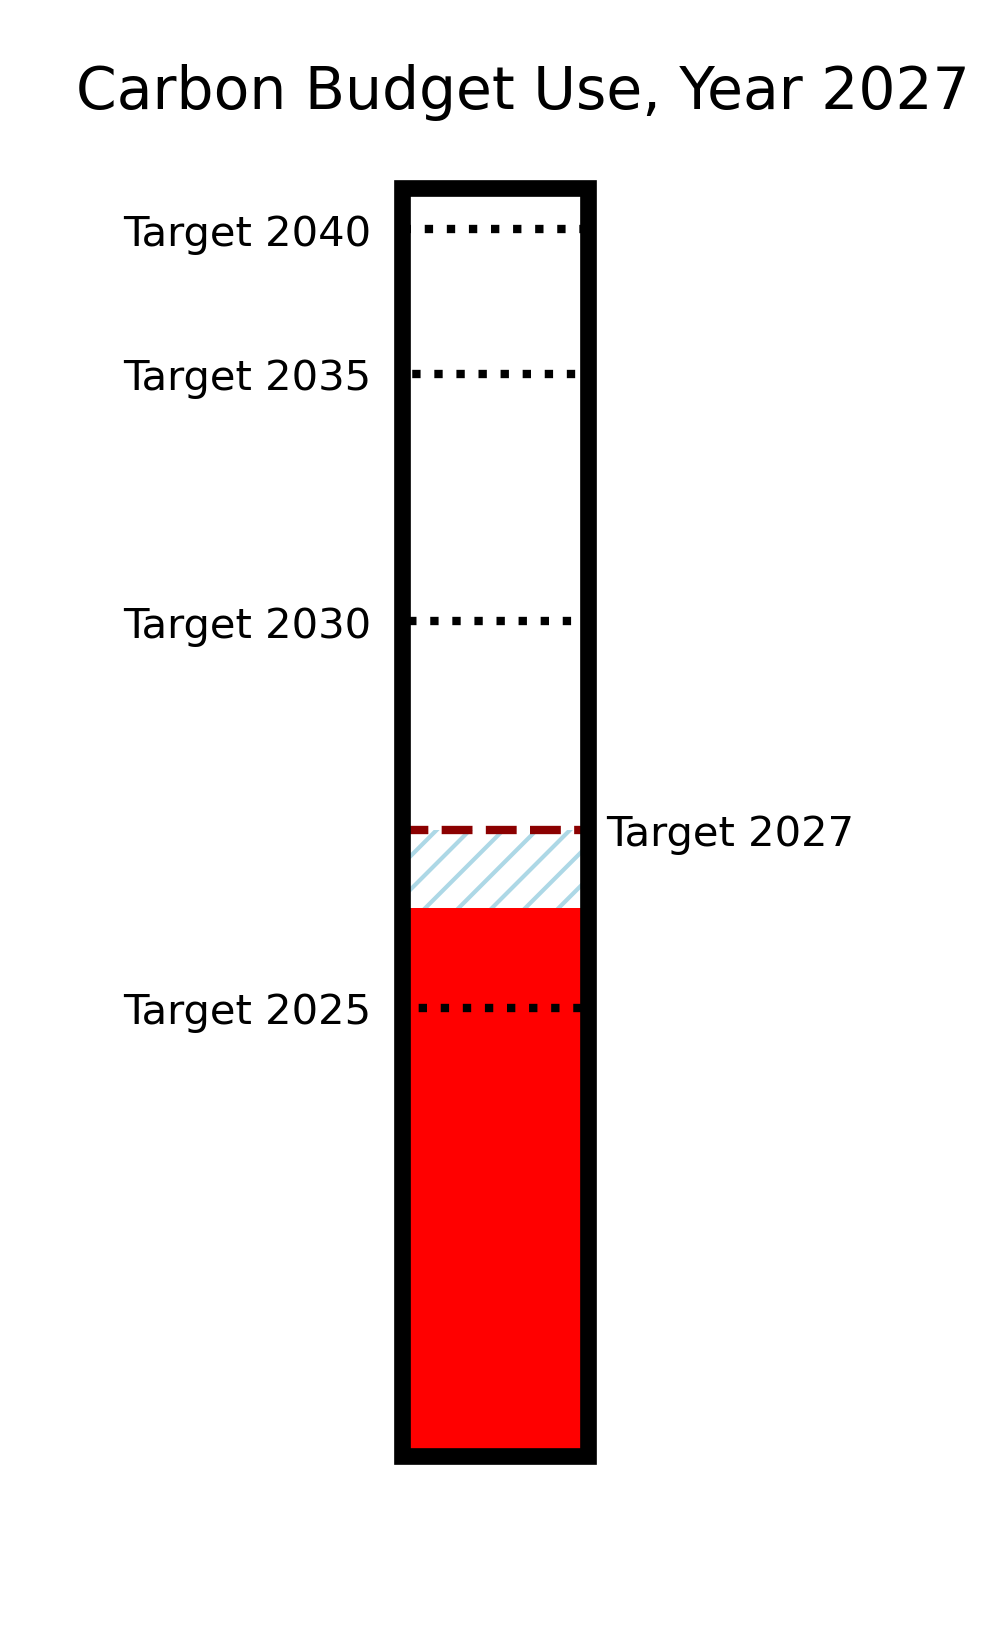

In [210]:
#Budget by year
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

year = 2027

target = np.sum(co2e_expected[3:year-2018])
trend = np.sum(example_trajectory[3:year-2018])

t_2040 = np.sum(co2e_expected[3:22])
t_2035 = np.sum(co2e_expected[3:17])
t_2030 = np.sum(co2e_expected[3:12])
t_2025 = np.sum(co2e_expected[3:7])


fig = plt.figure(1, figsize=[4,7],dpi=300)
ax = plt.gca()
#ax = fig.add_subplot(1, 1, 1)


box_2025 = Rectangle([0.4,0.1],0.2,0.8*t_2025/total_budget, ec='k', fc=[0,0,0,0], ls=':', lw=2)
box_2030 = Rectangle([0.4,0.1],0.2,0.8*t_2030/total_budget, ec='k', fc=[0,0,0,0], ls=':', lw=2)
box_2035 = Rectangle([0.4,0.1],0.2,0.8*t_2035/total_budget, ec='k', fc=[0,0,0,0], ls=':', lw=2)
box_2040 = Rectangle([0.4,0.1],0.2,0.8*t_2040/total_budget, ec='k', fc=[0,0,0,0], ls=':', lw=2)

current = Rectangle([0.4,0.1],0.2,0.8*trend/total_budget, ec='r', fc='r', lw=0)
current_target = Rectangle([0.4,0.1],0.2,0.8*target/total_budget, ec='darkred', fc=[0,0,0,0], ls='--', lw=2)

if trend < target:
    difference = Rectangle([0.4,0.1+0.8*trend/total_budget],0.2,0.8*(target-trend)/total_budget, 
                           ec='lightblue', fc=[0,0,0,0], lw=0, hatch='///')
else: 
    difference = Rectangle([0.4,0.1+0.8*trend/total_budget],0.2,0.8*(target-trend)/total_budget, 
                           ec='darkred', fc=[0,0,0,0], lw=0, hatch='///')
boundary = Rectangle([0.4,0.1],0.2,0.8, ec='k', fc=[0,0,0,0], lw=4)

ax.text(0.10,0.8*t_2025/total_budget+0.09,'Target 2025')
ax.text(0.10,0.8*t_2030/total_budget+0.09,'Target 2030')
ax.text(0.10,0.8*t_2035/total_budget+0.09,'Target 2035')
ax.text(0.10,0.8*t_2040/total_budget+0.09,'Target 2040')
ax.text(0.62,0.8*target/total_budget+0.09,'Target {}'.format(year))

ax.text(0.05,0.95,'Carbon Budget Use, Year {}'.format(year),fontsize=14)

ax.add_patch(difference)
ax.add_patch(current)
ax.add_patch(current_target)

ax.add_patch(box_2025)
ax.add_patch(box_2030)
ax.add_patch(box_2035)
ax.add_patch(box_2040)

ax.add_patch(boundary)

plt.axis('off')
plt.savefig('Example_budget.png',facecolor='white')
#canvas.print_figure('Example_budget.png',facecolor='white')